# Breast Cancer Wisconsin Dataset Binomial Naive Bayes Analysis

##### Dataset source:https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

### About dataset

### Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.


### This database is also available through the UW CS ftp server:
#### ftp ftp.cs.wisc.edu
#### cd math-prog/cpo-dataset/machine-learn/WDBC/

## Attribute Information

#### 1) ID number
#### 2) Diagnosis (M = malignant, B = benign)


### Ten real-valued features are computed for each cell nucleus:

#### a) radius (mean of distances from center to points on the perimeter)
#### b) texture (standard deviation of gray-scale values)
#### c) perimeter
#### d) area
#### e) smoothness (local variation in radius lengths)
#### f) compactness (perimeter^2 / area - 1.0)
#### g) concavity (severity of concave portions of the contour)
#### h) concave points (number of concave portions of the contour)
#### i) symmetry
#### j) fractal dimension ("coastline approximation" - 1)

In [1]:
import pandas as pd #to manipulate the dataframe
import matplotlib.pyplot as plt #for pie chart visualisation
from sklearn.model_selection import train_test_split #for splitting the data into training and testing datasets
from sklearn.naive_bayes import GaussianNB #for using naive bayes machine learning model
import seaborn as sns #for generating heatmap,pairplot and confusion matrix

In [2]:
cancer_dataset = pd.read_csv('D:\sem6\ML\lab_assignment\cancer_dataset.csv')

In [3]:
#Count the number of rows and columns in the data set
cancer_dataset.shape

(569, 33)

In [4]:
#Viewing dataset
cancer_dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [5]:
#Finding out how many null values for each attribute
cancer_dataset.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

###### None of the features have any null values except for Unnamed: 32,this column has all null value for all samples and is therefore useless,hence we will remove it

In [6]:
#Calculating basic statistics of dataset
cancer_dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [7]:
#Viewing the datatypes of all rows
cancer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### Getting rid of unnecessary columns

In [8]:
cancer_dataset = cancer_dataset.drop(['id','Unnamed: 32'],axis = 1)

In [9]:
# inspecting the datatypes of the features,and checking whether the Unnamed: 32 column is dropped
cancer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

###### The unnamed: 32 column has been successfully removed
###### Also,the diagnosis column is of object type,hence it must be encoded

In [10]:
#obtaining counts for different diagnoses(M = malignant ,B = benign)
cancer_dataset['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

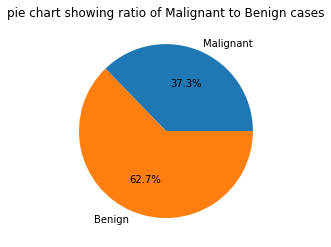

In [11]:
fig1,ax1 = plt.subplots()
labels = ['Malignant','Benign']
sizes = [212,357]
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('pie chart showing ratio of Malignant to Benign cases')
plt.savefig('malignant_benign_pie.png')
plt.show()

## We can infer that the dataset is imabalanced,most samples belong to Benign class

In [12]:
# encoding the categorical data values, 0=benign,1=malignant
cancer_dataset.diagnosis = [0 if i == "B" else 1 for i in cancer_dataset.diagnosis]

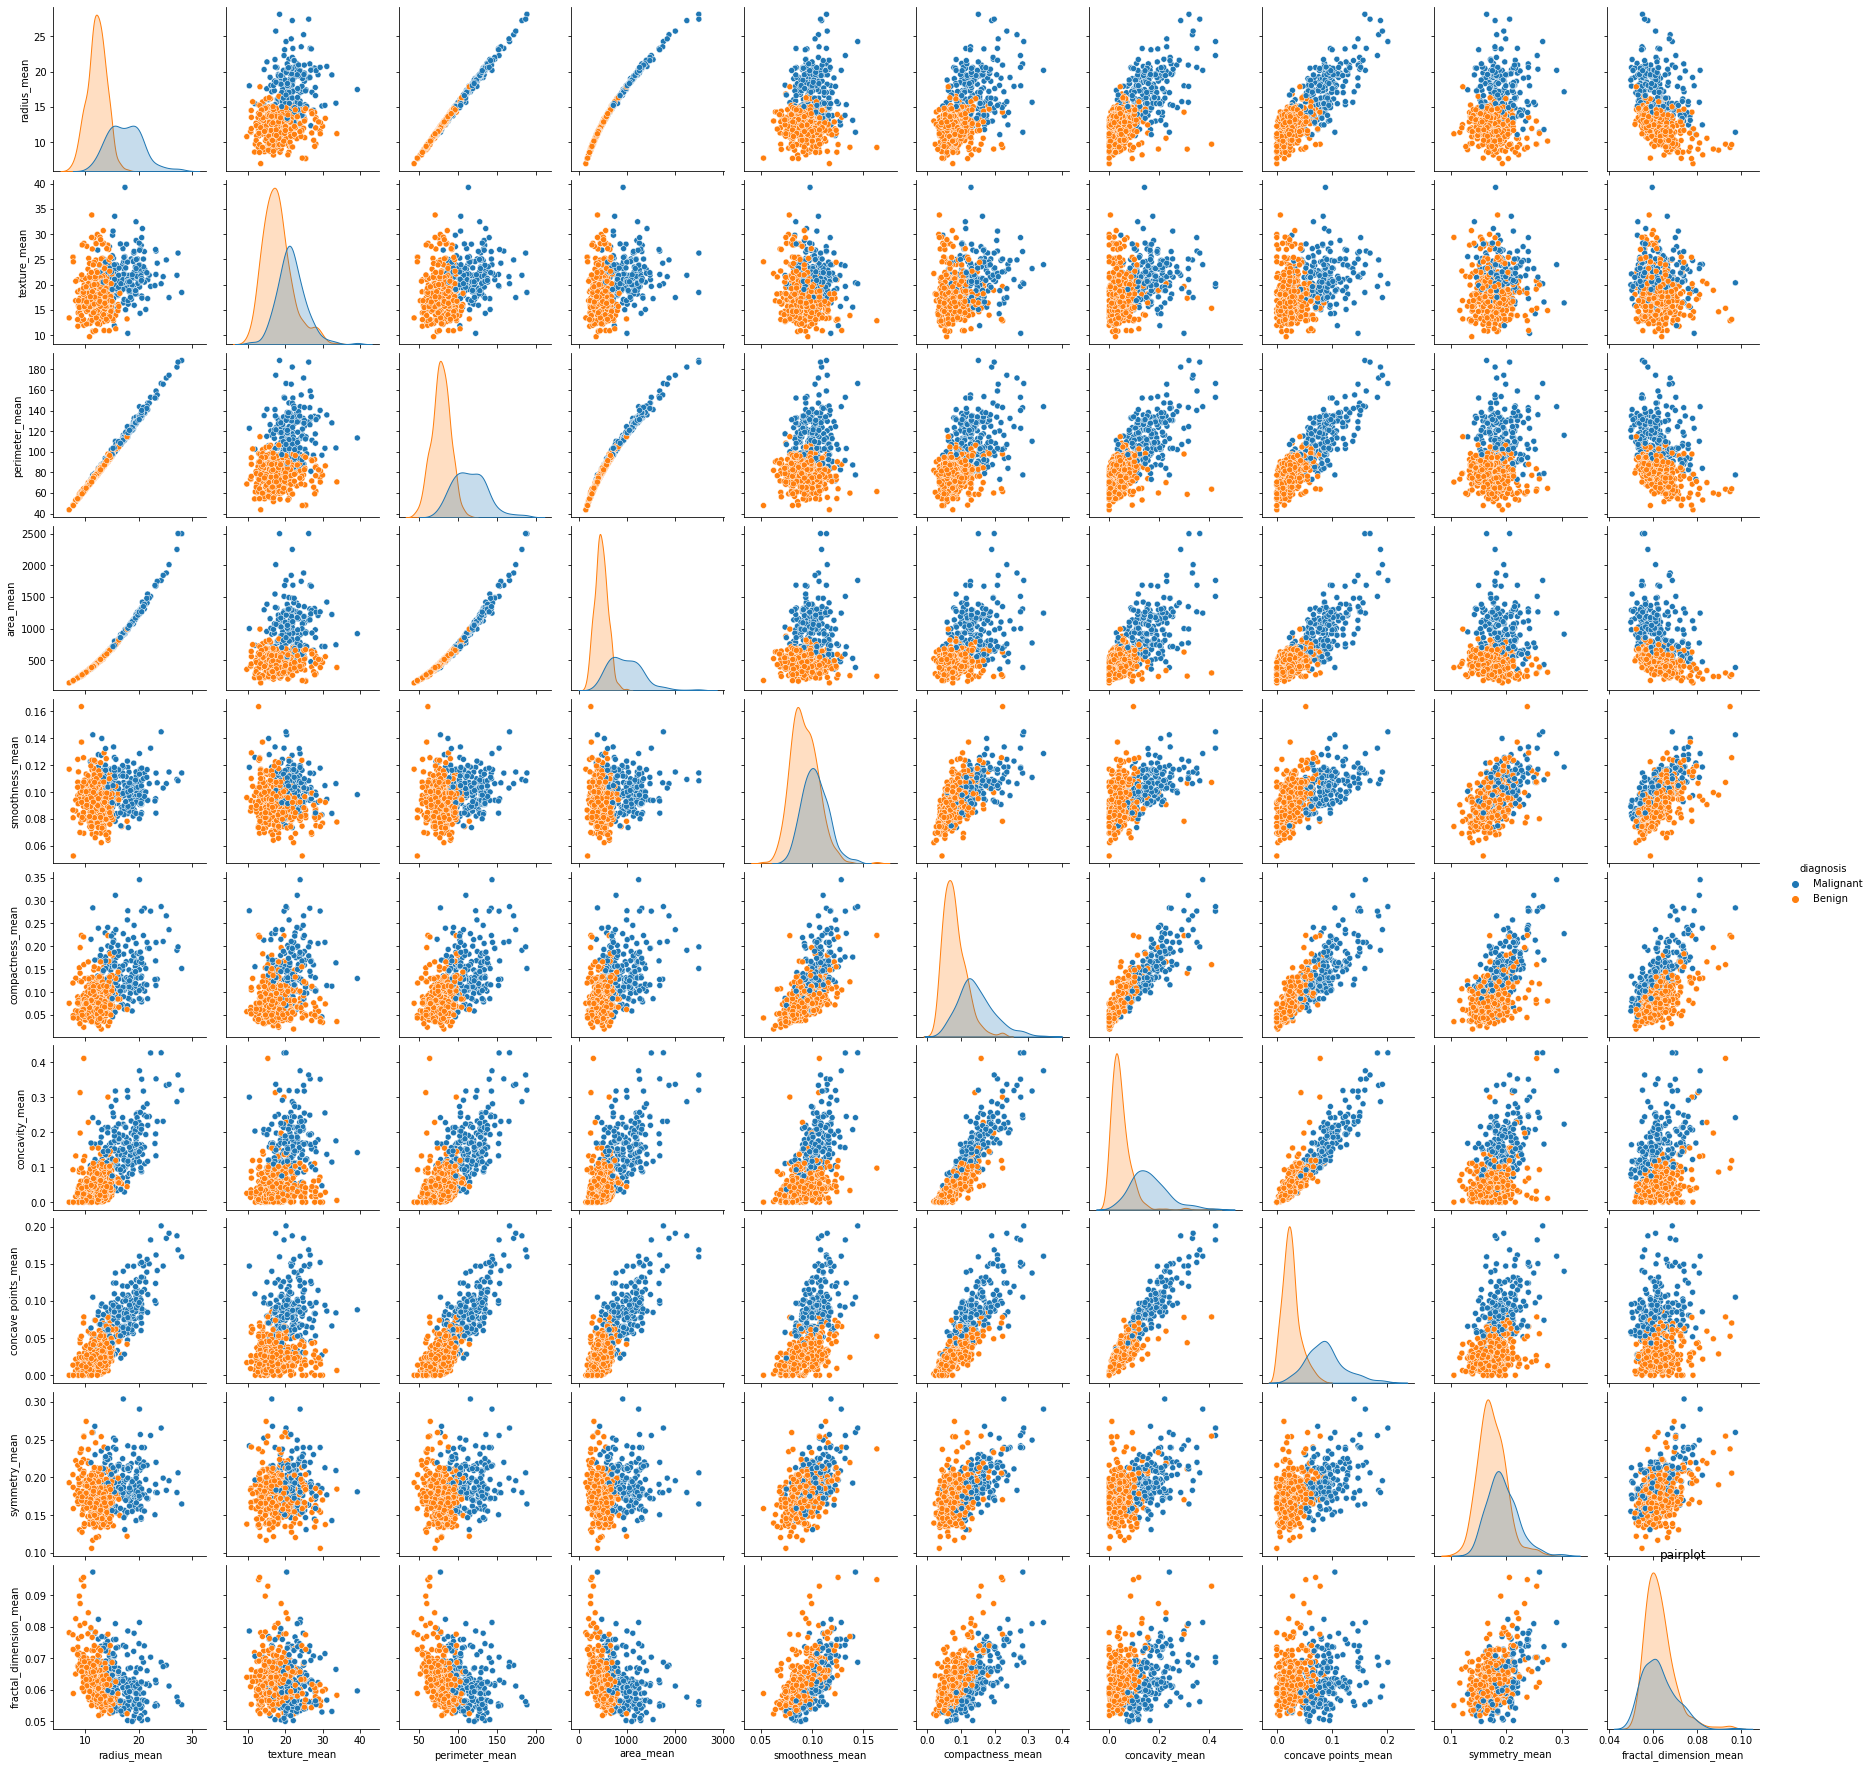

In [13]:
#create a pair plot
df = cancer_dataset.copy()
df.diagnosis = ['Benign' if i==0 else 'Malignant' for i in df.diagnosis]
sns.pairplot(df.iloc[:,0:11],hue='diagnosis')
plt.title('pairplot')
plt.savefig('pairplot.png')

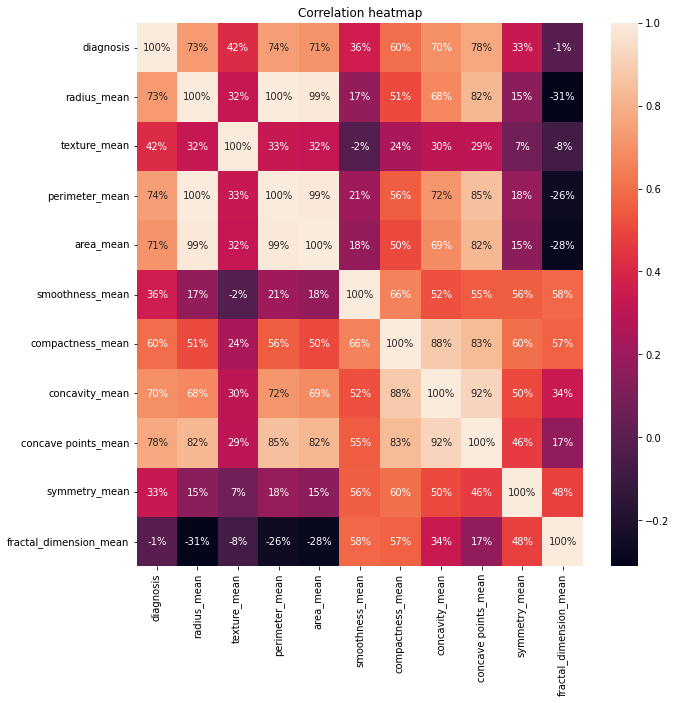

In [14]:
#visualising the correlations between different properties
plt.figure(figsize=(10,10))
sns.heatmap(cancer_dataset.iloc[:,0:11].corr(),annot=True,fmt='.0%')
plt.title('Correlation heatmap')
plt.savefig('heatmap.png')

###### There is a high positive correlation between
###### radius_mean,perimeter_mean
###### radius_mean,area_mean
###### radius_mean,concave_points_mean
###### perimeter_mean,concave points mean
###### area_mean,concave_points_mean
###### compactness_mean,concavity_mean
###### compactness_mean,concave_points_mean

### Creating binomial naive bayes machine learning model to predict whether tumor is benign or malignant

In [15]:
# We must predict the value of diagnosis feature for each sample based on all other features
X = cancer_dataset.drop(['diagnosis'],axis=1)
y = cancer_dataset.diagnosis.values

In [16]:
#split the data set into 75% training and 25% testing

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25 ,random_state = 42 )

In [17]:
#initialising model
naive_bayes_model = GaussianNB()

In [18]:
#training the model using training data
naive_bayes_model.fit(X_train,y_train)

GaussianNB()

In [19]:
#using trained model to generate predictions for testing data
y_pred = naive_bayes_model.predict(X_test)

## Evaluating classification model

In [20]:
#calculating confusion matrix,accuracy,recall,precision

from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score
cm = confusion_matrix(y_test,y_pred)

In [21]:
#obtaining values for true positive,true negative,false positive,false negative
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

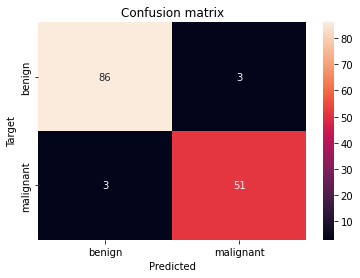

In [22]:
#visualising confusion matrix
x_axis_labels=['benign','malignant']
y_axis_labels=['benign','malignant']
sns.heatmap(cm,annot=True,xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Target')
plt.savefig('confusion_matrix.png')

### Out of 143 samples in y_test and y_pred,
#### 89 tumor samples are benign,of which 86 were classified correctly,and 3 incorrectly
#### 54 tumor samples are malignant,of which 51 were classified correctly,and 3 incorrectly

In [23]:
#overall,how often is the classifier's predictions correct?
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)


0.958041958041958


In [24]:
#overall how often is the classifier incorrect?
error = 1-accuracy
print(error)

0.04195804195804198


In [25]:
# Sensitivity and recall,what proportion of positive samples,are classified by the model correctly?
recall = recall_score(y_test,y_pred)
print(recall)

0.9444444444444444


In [26]:
#specificity,what proportion of negative samples,are correctly classified by the model correctly?
specificity = TN/float(TN+FP)
print(specificity)

0.9662921348314607


In [27]:
#what proportion of samples classified as positive are classified correctly?
precision = precision_score(y_test, y_pred)
print(precision)

0.9444444444444444


In [28]:
#False positive rate,what proportion of negative samples are misclassified?
FPR = FP/float(TN+FP)
print(FPR)

0.033707865168539325


In [29]:
#F-measure is a single number between 0-1 that summarizes model performance.The better the model,the closer it's F-measure is to 1
F_measure = (2*precision*recall)/(precision+recall)
print(F_measure)

0.9444444444444444


# Inferences:
### accuracy=0.95804,therefore our model usually classifies samples correctly
### error=0.041958,therefore our model rarely misclassifies
### sensitivity,recall=0.94444,therefore our model is reliable for classifying positive(malignant) samples
### specificity=0.96629,therefore our model is reliable for classifying negative(benign) samples
### precision=0.94444,therefore positively(malignant) classified samples can mostly be assumed to be classified correctly
### false positive rate=0.0337,therefore our model rarely gives false positives.Benign tumors are unlikely to be classified as malignant
### F-measure=0.9444,Since F-measure is close to 1,this model performs well

# We have succesfully trained a binomial naive bayes classifier to detect whether or not a patient has breast cancer based on various properties associated with the tumor measured using a digitized image from fine needle aspirate of the breast mass.